In [96]:
## overall plan: short and to the point in itemized form
##introduction section
#0 show the node id labels for a single feature each
task0 = "show the node id labels for a single feature each"
#1 show ring network
task1 = "show the ring network "
#2 show ring network for k=[0,...,K] and the adjacency and normalized adjacency matrix as well (3 sets of matrix)
task2 = "show ring/adjacency/S networks and matrices for k=[0,...,N]"
##methodology section
#3 produce a method/tool to monitor/analyze the label changes on the overall network 
#4 show it on a situation with 2D features per node
#5 show how a famous network like Zachary can display a spread of ideologies and monitor
#6 infer the parameters with SGC and then run the simulation on that for same results

#paper points
#we assume that the difference between a markov chain or a 
#control theory perspective is that the markov chain or the 
#recursive function the state of the nodes change. HERE WE ASSUME
#THAT THE NODES STAY THE SAME WITH THEIR NATURAL FIXED PREDISPOSITIONS
#AND THAT THEIR ENVIRONMENT SHIFTS THEIR PERSPECTIVE. 
#so we start with a single features and see how the environment changes
#them according to different degrees of interaction.
#and that the dynamics of the interactions are constant as well.
#we consider 'k' to be equivalent to a social process 'epoch'
#time index which registers new time points of social exchange 
#without underlying user change.

"show ring/adjacency/S networks and matrices for k=[0,...,N]"

In [97]:
using LinearAlgebra, Plots, LightGraphs, DelimitedFiles, Random, StatsPlots


In [98]:
##introduction

In [99]:
NN1 = 20;

blueNodes = [5,10,11,12,14,15];

varX = [];

K_MAX = 15

#all the adjacency matrices at different powers
Adj_Dict = []
#all the normed adjacency matrices at different powers
Adj_Normed_Dict = []

0-element Array{Any,1}

In [100]:
print(varX)

Any[]

In [101]:
function makeSingleFeatureVect()
    global varX
    varX = rand(NN1,1)
    [varX[i] = -1 * rand() for i in blueNodes]
end
makeSingleFeatureVect();

In [102]:
function displaySingleFeature()    
    global varX
    varXwide = repeat(varX,outer=(1,6))
    hVarX = heatmap(varXwide,title="Node Features",
            yaxis=:flip,aspect_ratio=1.0,
            framestyle=:box,legend=nothing,ylims=(0.5,NN1+0.5),
            yticks=0:1:NN1,xticks=(1:5:6,["" ""]),xlims=(1,6),
            c=cgrad([:blue,:red]))
    return hVarX
end

function displayProjectedFeature(projectionX,powerInd)   
    varXwide = repeat(projectionX,outer=(1,6))
    hVarX = heatmap(varXwide,title="Regression power=$(powerInd)",
                yaxis=:flip,aspect_ratio=1.0,
                framestyle=:box,legend=nothing,ylims=(0.5,NN1+0.5),
                yticks=0:1:NN1,xticks=(1:5:6,["" ""]),xlims=(1,6),
                c=cgrad([:blue,:red]))
    return hVarX
end
#adding the thresholds for the colors
function displaySingleFeatureThres()    
    global varX
    varXwide = repeat(varX,outer=(1,6))
    hVarX = heatmap(varXwide,title="Node Features",
            yaxis=:flip,aspect_ratio=1.0,
            framestyle=:box,legend=nothing,ylims=(0.5,NN1+0.5),
            yticks=0:1:NN1,xticks=(1:5:6,["" ""]),xlims=(1,6),
            fill=cgrad([:blue,:red]),clims=(-1,1))
    return hVarX
end

function displayProjectedFeatureThres(projectionX,powerInd)   
    varXwide = repeat(projectionX,outer=(1,6))
    hVarX = heatmap(varXwide,title="Regression power=$(powerInd)",
                yaxis=:flip,aspect_ratio=1.0,
                framestyle=:box,legend=nothing,ylims=(0.5,NN1+0.5),
                yticks=0:1:NN1,xticks=(1:5:6,["" ""]),xlims=(1,6),
                fill=cgrad([:blue,:red]),clims=(-1,1))
    return hVarX
end

displayProjectedFeatureThres (generic function with 1 method)

In [103]:
function vizMatrix(Adj,powerInd)
    global NN1
    hAdjNN1 = heatmap(Adj,title="Adjacency Matrix, power=$(powerInd)",
        showaxis=true,yaxis=:flip,aspect_ratio=1.0,
        framestyle=:box,xlims=(0.0,NN1+1.0),
        legend=true,ylims=(0.0,NN1+0.5),
        yticks=0:5:NN1,xticks=0:5:NN1,
        fill=cgrad([:white,:black]))#c=cgrad([:white,:black],clims=(0,1)))
    return hAdjNN1
end
function vizMatrixNormed(Adj)
    global NN1
    hAdjNN1 = heatmap(Adj,title="Normalized Adjacency",
        showaxis=true,yaxis=:flip,aspect_ratio=1.0,
        framestyle=:box,xlims=(0.0,NN1+1.0),
        legend=true,ylims=(0.0,NN1+0.5),
        yticks=0:5:NN1,xticks=0:5:NN1,
        fill=cgrad([:white,:black]))
    return hAdjNN1
end
#so that the values of the color map are constrained between these values
function vizMatrixThresh(Adj,powerInd)
    global NN1
    hAdjNN1 = heatmap(Adj,title="Adjacency Matrix, power=$(powerInd)",
        showaxis=true,yaxis=:flip,aspect_ratio=1.0,
        framestyle=:box,xlims=(0.0,NN1+1.0),
        legend=true,ylims=(0.0,NN1+0.5),
        yticks=0:5:NN1,xticks=0:5:NN1,
        fill=cgrad([:white,:black]),clims=(0,1))#c=cgrad([:white,:black],clims=(0,1)))
    return hAdjNN1
end
function vizMatrixNormedThresh(Adj)
    global NN1
    hAdjNN1 = heatmap(Adj,title="Normalized Adjacency",
        showaxis=true,yaxis=:flip,aspect_ratio=1.0,
        framestyle=:box,xlims=(0.0,NN1+1.0),
        legend=true,ylims=(0.0,NN1+0.5),
        yticks=0:5:NN1,xticks=0:5:NN1,
        fill=cgrad([:white,:black]),clims=(0,1))
    return hAdjNN1
end

vizMatrixNormedThresh (generic function with 1 method)

In [104]:
function makeRingAdjacency()
    global NN1
    #make the adjacency for the ring network
    AdjNN1 = zeros(NN1,NN1)
    for ii in 1:size(AdjNN1)[1]
        for jj in 1:size(AdjNN1)[2]            
            if(ii == (jj+1))
                AdjNN1[ii,jj] = 1
            elseif(ii == (jj-1))
                AdjNN1[ii,jj] = 1
            end        
        end
    end
    AdjNN1[1,NN1] = 1
    AdjNN1[NN1,1] = 1    
    return AdjNN1
end

makeRingAdjacency (generic function with 1 method)

In [105]:
function adjacency2Smatrix(AdjMat)
    Adj = deepcopy(AdjMat)
    #make the diagonal for the adj matrix
    diag1 = zeros(size(Adj)[1],size(Adj)[2])
    [diag1[i,i]=1 for i in 1:size(diag1)[1]] 
    #add self-loops as the paper describes
    Adj .+= diag1
    #get degree matrix
    degrees = sum(Adj,dims=2)
    diag2 = zeros(size(Adj)[1],size(Adj)[2])
    [diag2[i,i]=degrees[i] for i in 1:size(diag1)[1]] 
    #make the diagonal matrix to the power of -1/2
    diag2 = diag2^(-1/2)
    #make the normalized S matrix
    S = diag2 * Adj * diag2
    return S
end    
    

adjacency2Smatrix (generic function with 1 method)

In [106]:
#define associated vector of attributes for each node that can be eg [burger, pizza]
#define the identity of each node as training data
function redStr(pol)
    rpol = round(pol,digits=1)
  
    if(rpol == 1.0)
        return "#FF5555"
    elseif(rpol == 0.9)
        return "#FE5555"
    elseif(rpol == 0.8)
        return "#EE6666"    
     elseif(rpol == 0.7)
        return "#ED6666"
     elseif(rpol == 0.6)
        return "#DD7777" 
    elseif(rpol == 0.5)
        return "#DC7777"
        elseif(rpol == 0.4)
        return "#CC8888"
        elseif(rpol == 0.3)
        return "#CB8888"
        elseif(rpol == 0.2)
        return "#BB9999"
        elseif(rpol == 0.1)
        return "#BA9999"
      elseif(rpol == 0.0)
        return "#AAAAAA"  
    end
end

function blueStr(pol)
    rpol = round(pol,digits=1)
  
    if(rpol == -1.0)
        return "#5555FF"
    elseif(rpol == -0.9)
        return "#5555FE"
    elseif(rpol == -0.8)
        return "#6666EE"    
     elseif(rpol == -0.7)
        return "#6666ED"
     elseif(rpol == -0.6)
        return "#7777DD" 
    elseif(rpol == -0.5)
        return "#7777DC"
        elseif(rpol == -0.4)
        return "#8888CC"
        elseif(rpol == -0.3)
        return "#8888CB"
        elseif(rpol == -0.2)
        return "#9999BB"
        elseif(rpol == -0.1)
        return "#9999BA"
      elseif(rpol == 0.0)
        return "#AAAAAA"  
    end
end


blueStr (generic function with 1 method)

In [107]:
function singleVarGraphVizImageMake(Adj,imageName)
    global varX
    strNN1=""
    #init
    strNN1 *= "strict digraph graphname { concentrate=true node [shape=circle, style=filled, fontsize=14] "
    #node insertions
    for ii in 1:size(Adj)[1]
        if(varX[ii] >= 0)
            tmpStr = redStr(varX[ii])        
            strNN1 *= "{node [style=filled,fillcolor=\"$(tmpStr)\"]"
            strNN1 *= " N$(ii) }"   
        else
            tmpStr = blueStr(varX[ii]) 
            strNN1 *= "{node [style=filled,fillcolor=\"$(tmpStr)\"]"
            strNN1 *= " N$(ii) }"   
        end
    end
    #edges insertion
    for ii in 1:size(Adj)[1]
        for jj in 1:size(Adj)[2]
            if(Adj[ii,jj] > 0)
                if(ii != jj)
                    strNN1 *= " N$(ii) -> N$(jj) [dir=both penwidth=$(Adj[ii,jj])];" #str *= " c -- d3 -- A2 -- a; "
                end
                if(ii == jj)
                    strNN1 *= " N$(ii) -> N$(jj) [penwidth=$(Adj[ii,jj])];" #str *= " c -- d3 -- A2 -- a; "
                end
            end
        end
    end
    #tie off
    strNN1 *= "}";
    fileNameNN1 = "$(imageName).dot"
    filePNGNN1 = "$(imageName).png"
    writedlm( string("./",fileNameNN1), [strNN1] ,quotes=false)
    run(`neato $fileNameNN1 -Tpng -o $filePNGNN1`)
    
end


singleVarGraphVizImageMake (generic function with 1 method)

In [108]:
#task0
println(task0)

show the node id labels for a single feature each


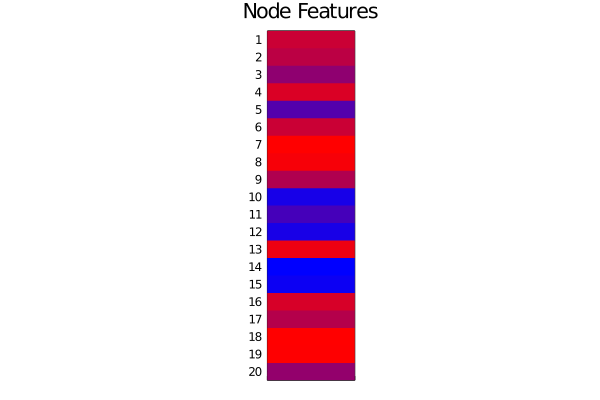

this feature set is fixed as personal inner voice


In [109]:
hVarX = displaySingleFeature()
p=plot(hVarX,layout=1)
display(p)
savefig(p,"nodeSingleFeatures.png")
println("this feature set is fixed as personal inner voice")

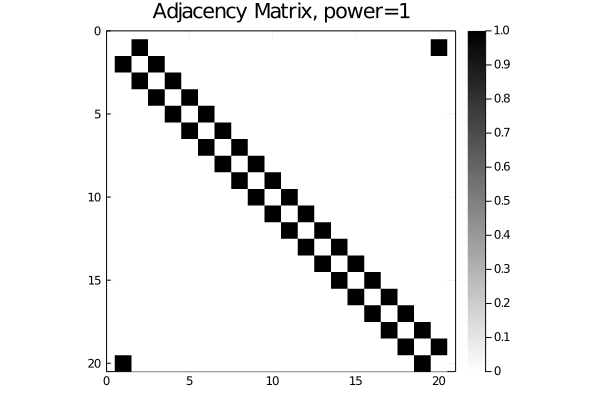

ring adj matrix


In [110]:
adjMatrix = makeRingAdjacency()
hVarX = vizMatrix(adjMatrix,1)
p1=plot(hVarX,layout=1)
display(p1)
savefig(p1,"adjmatrix.png")
println("ring adj matrix")

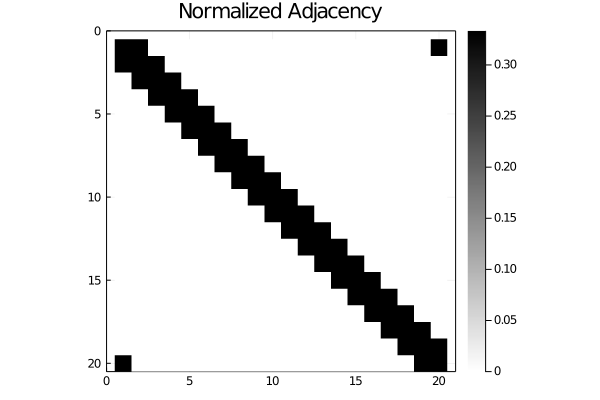

ring adj norm matrix


In [111]:
adjMatrixNorm = adjacency2Smatrix(deepcopy(adjMatrix))
hVarX2 = vizMatrixNormed(adjMatrixNorm)
p2=plot(hVarX2,layout=1)
display(p2)
savefig(p2,"adjmatrixNorm.png")
println("ring adj norm matrix")
adjMatrixNorm;

In [112]:
#task1
println(task1)

show the ring network 


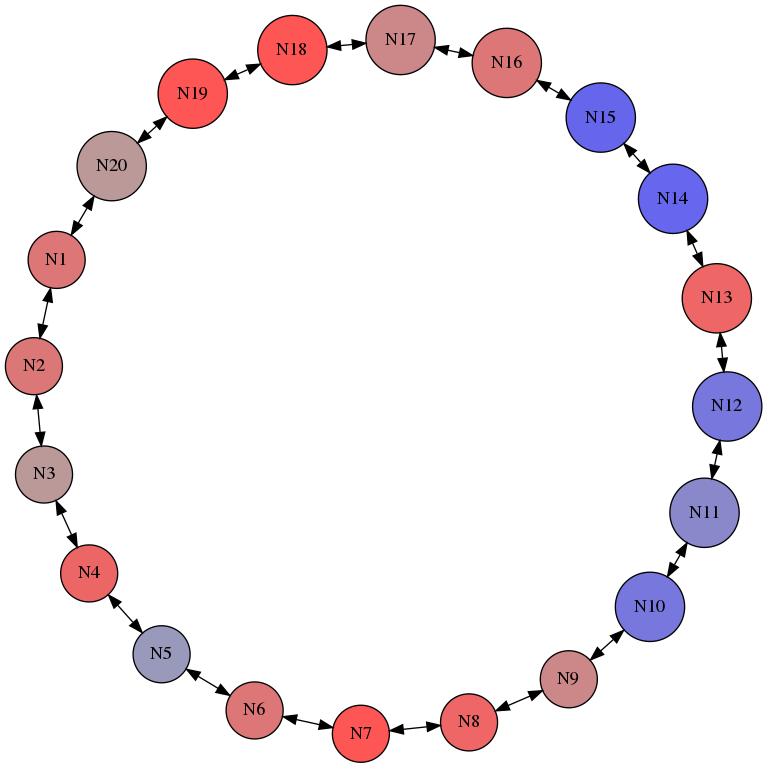

In [113]:
singleVarGraphVizImageMake(adjMatrix,"try")
display("image/png", read("try.png"))

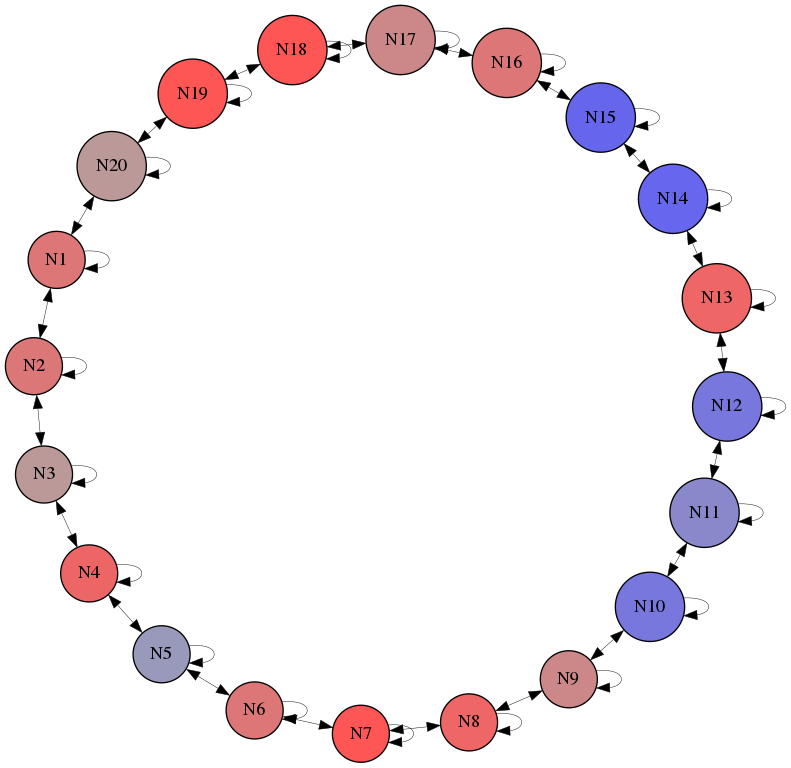

In [114]:
singleVarGraphVizImageMake(adjMatrixNorm,"try2")
display("image/png", read("try2.png"))

In [115]:
#task 2
println(task2)

show ring/adjacency/S networks and matrices for k=[0,...,N]


In [116]:
adjMatrixK1 = makeRingAdjacency()
Adj_Dict = Dict()
for i in 0:K_MAX   
    Adj_Dict[i] = adjMatrixK1^i
end


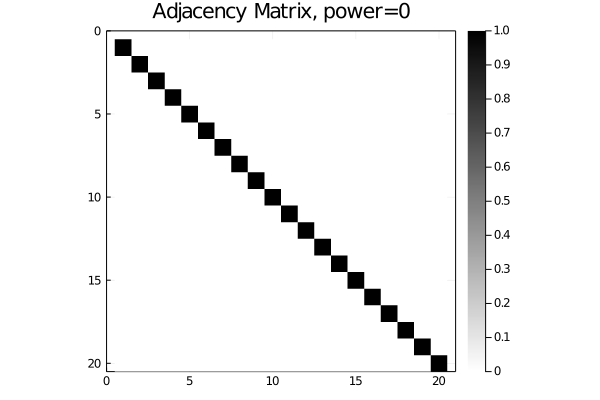

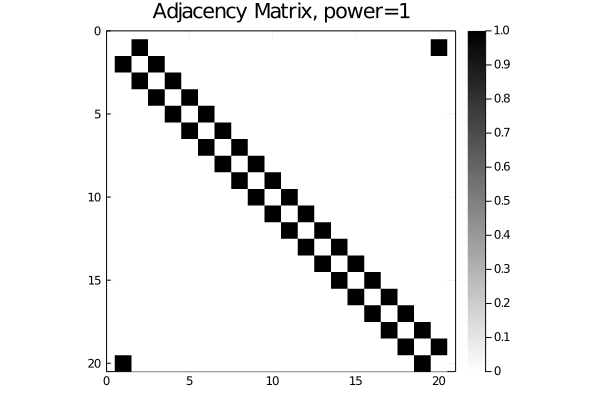

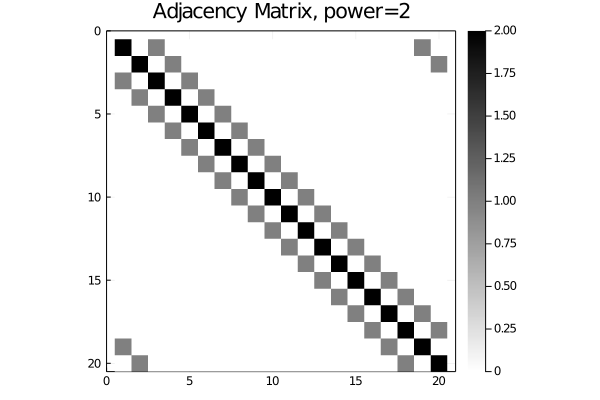

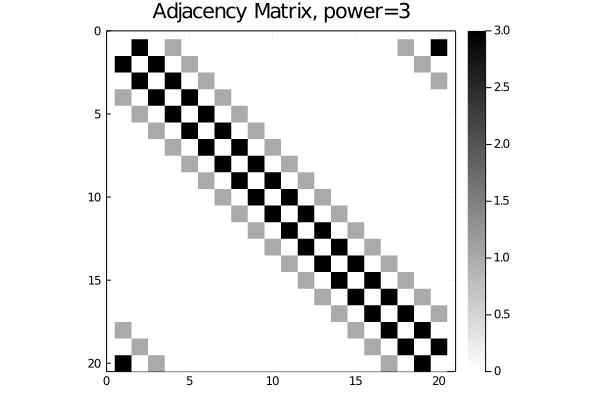

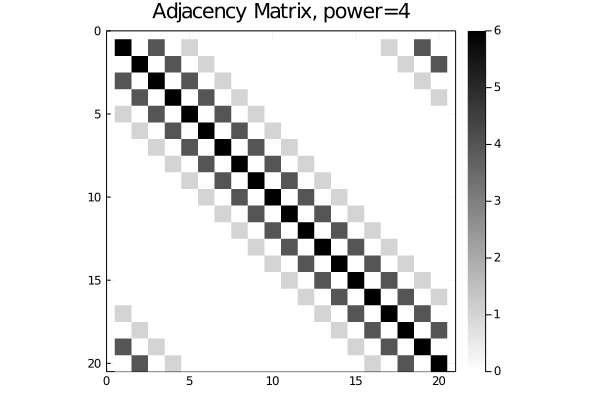

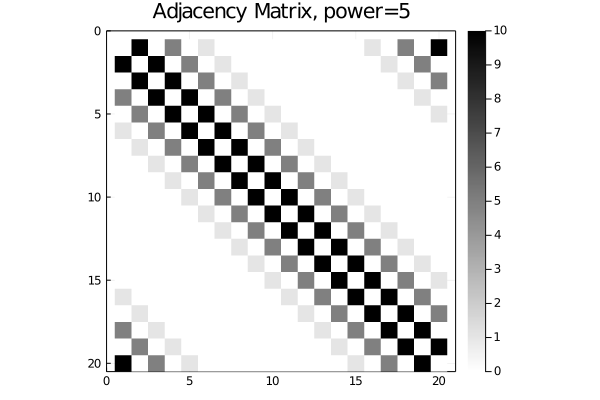

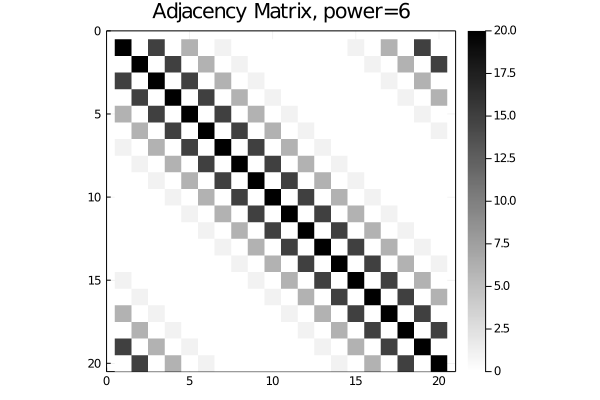

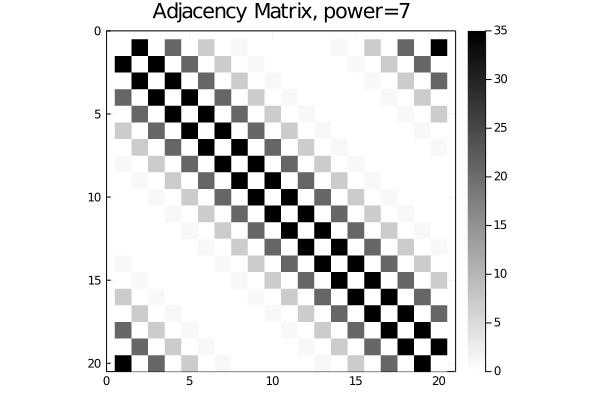

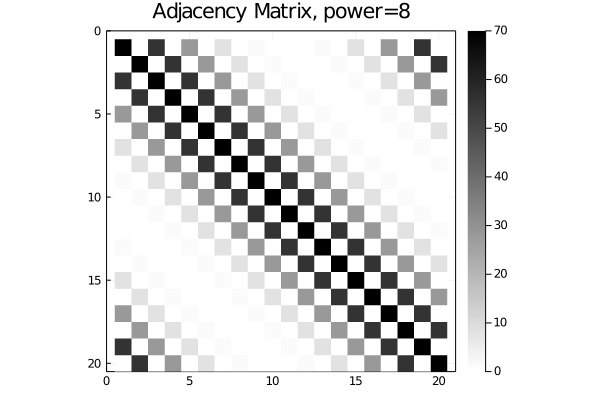

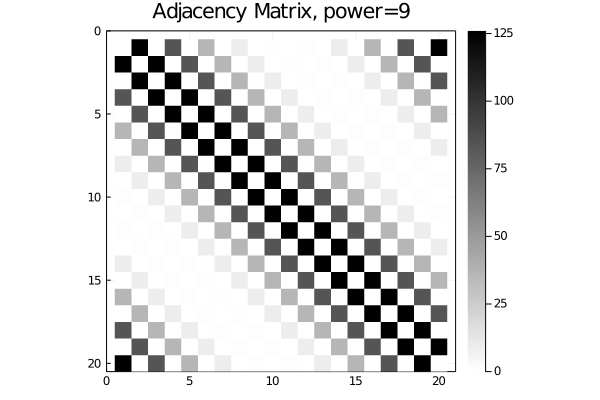

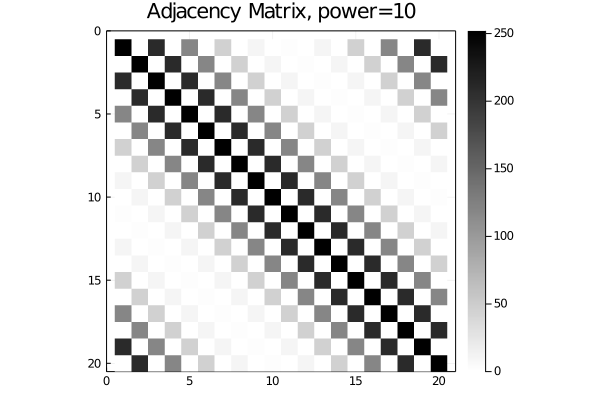

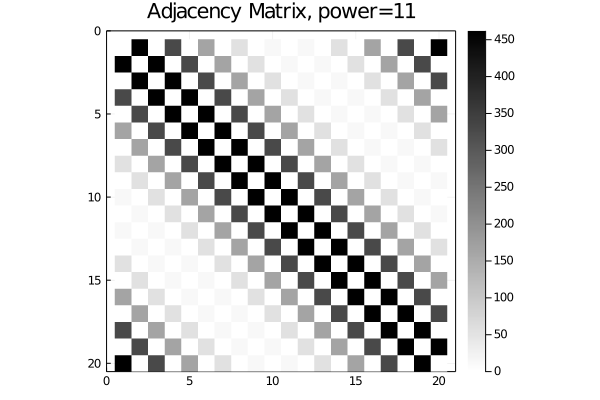

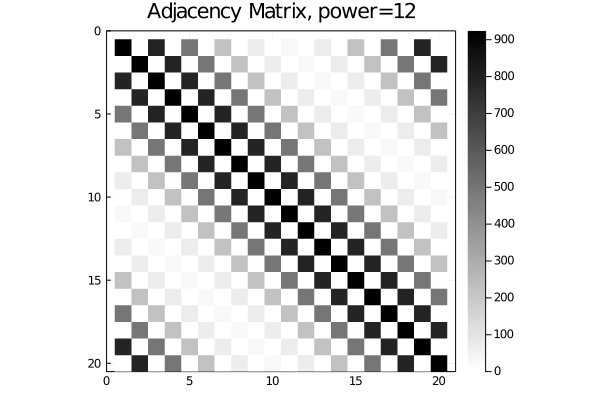

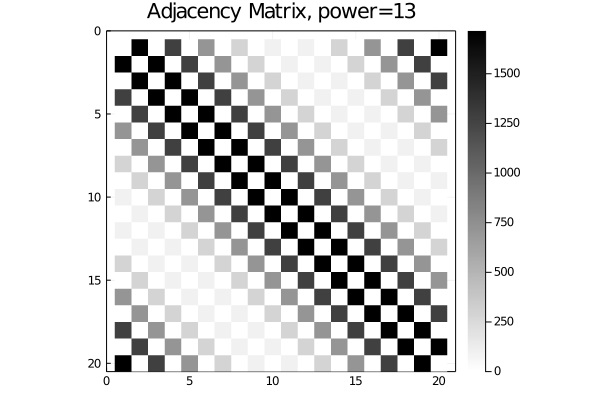

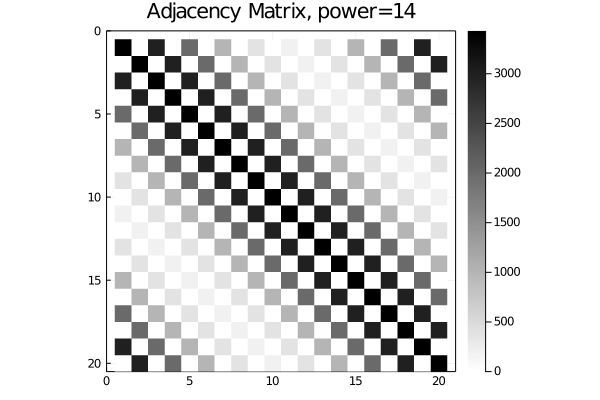

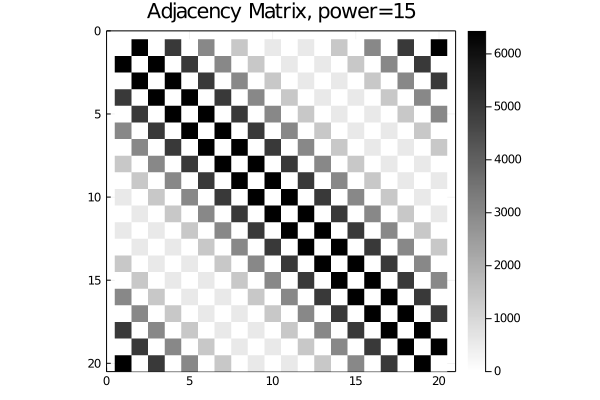

In [117]:
for i in 0:K_MAX   
    hVarX = vizMatrix(Adj_Dict[i],i)
    p1=plot(hVarX,layout=1)
    display(p1)
    savefig(p1,"adjmatrixPow$(i).png")    
end


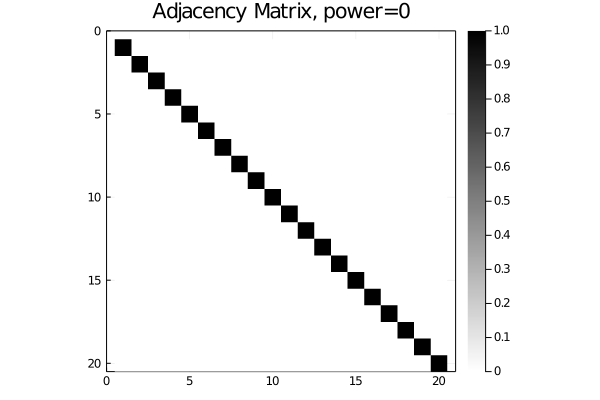

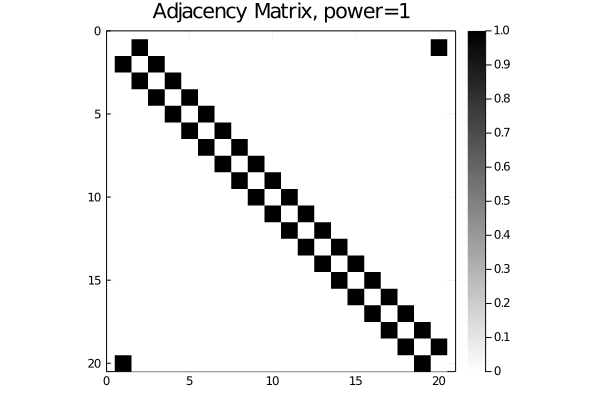

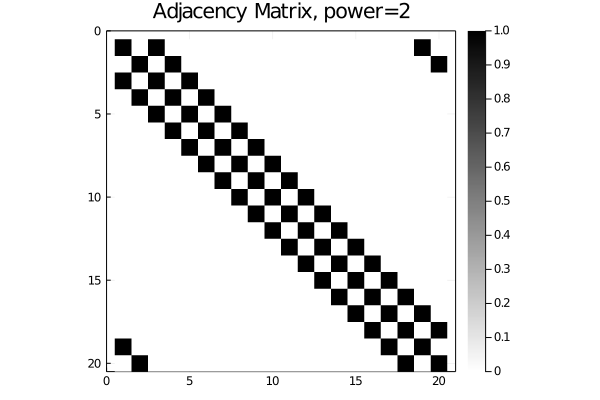

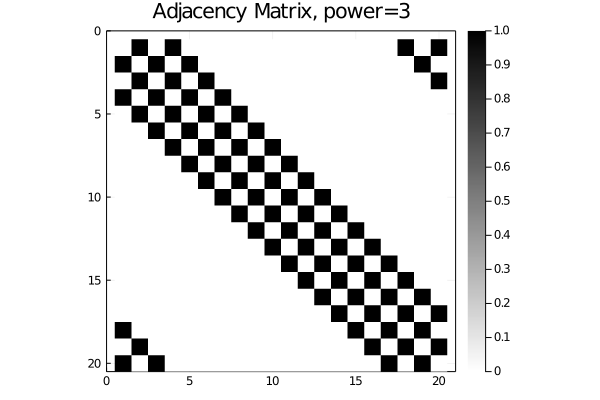

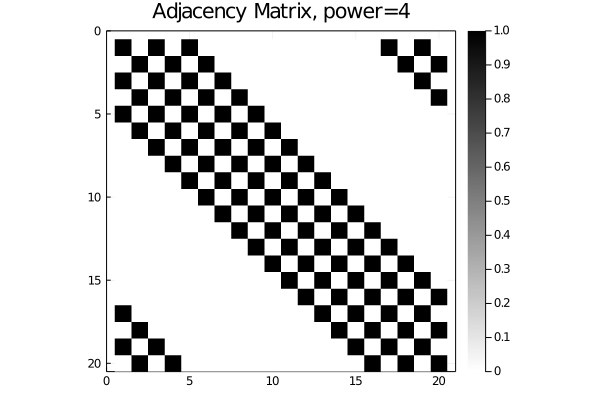

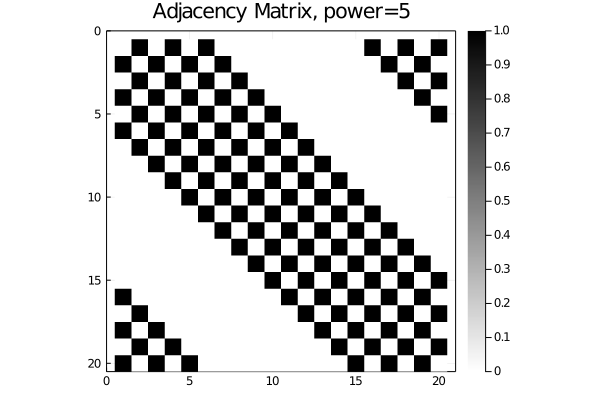

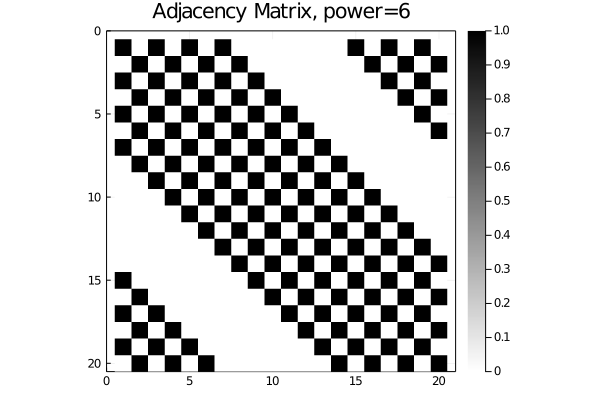

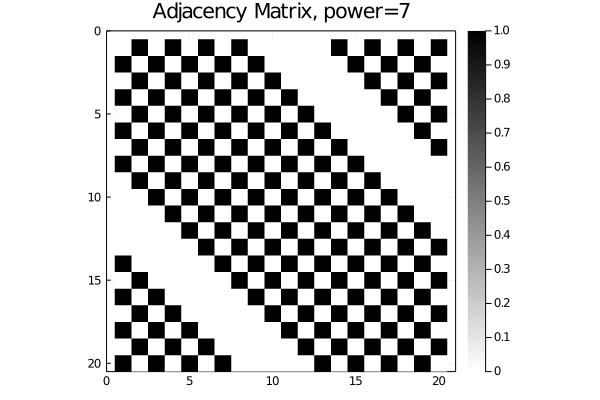

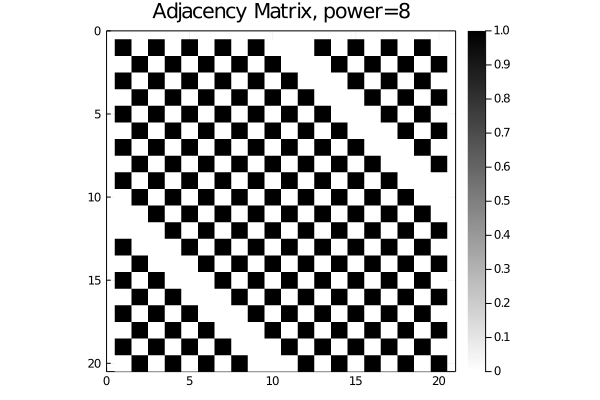

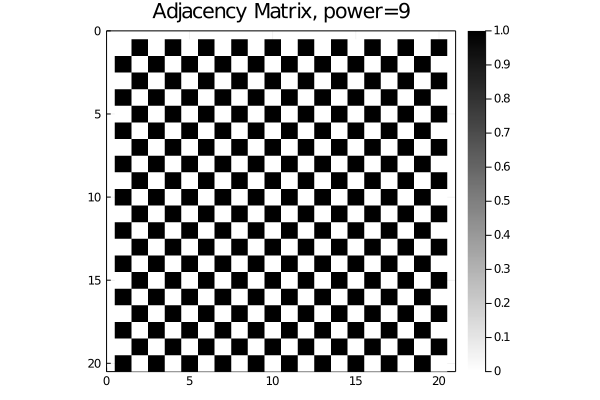

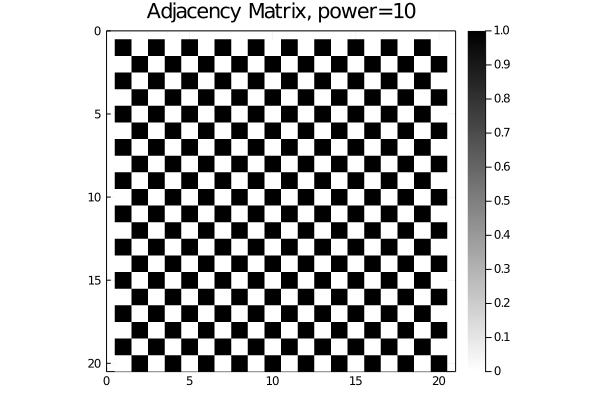

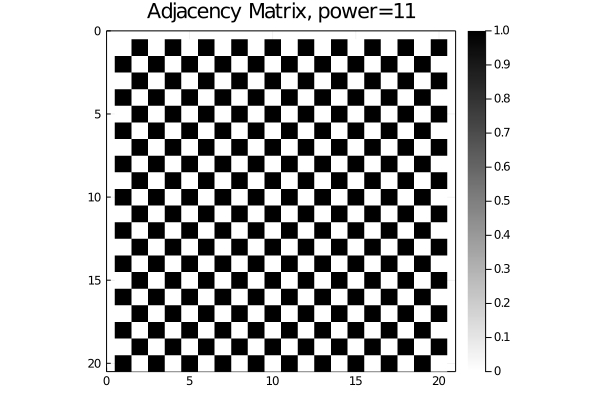

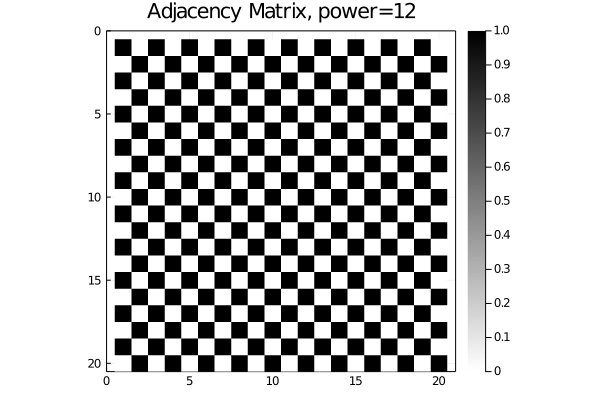

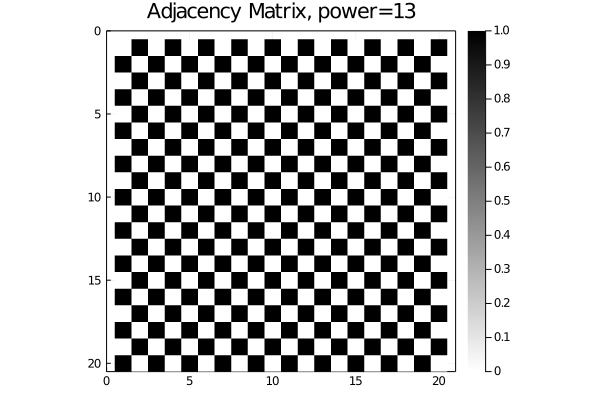

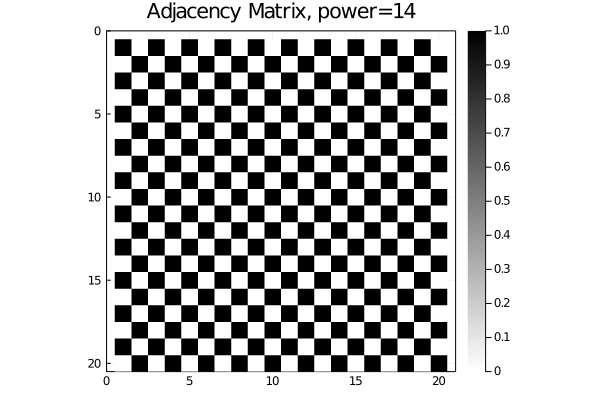

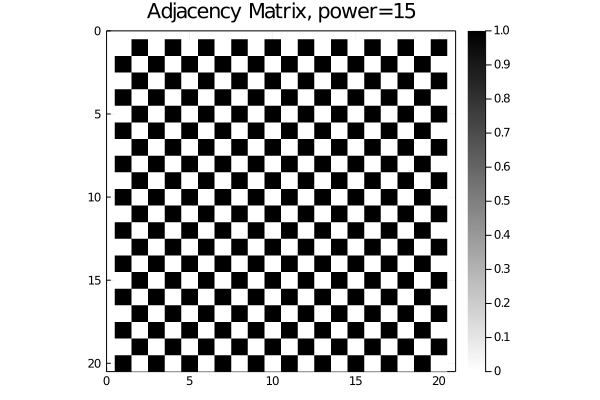

In [118]:
for i in 0:K_MAX   
    hVarX = vizMatrixThresh(Adj_Dict[i],i)
    p1=plot(hVarX,layout=1)
    display(p1)
    savefig(p1,"adjmatrixPowThresh$(i).png")    
end


In [119]:
adjMatrixNorm = adjacency2Smatrix(deepcopy(adjMatrixK1))
Adj_Normed_Dict = Dict()
for i in 0:K_MAX   
    Adj_Normed_Dict[i] = adjMatrixNorm^i
end

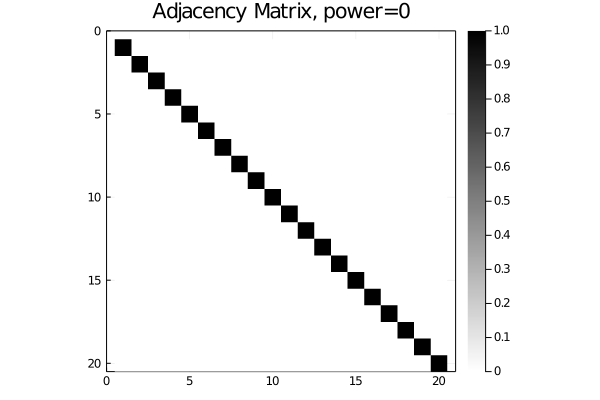

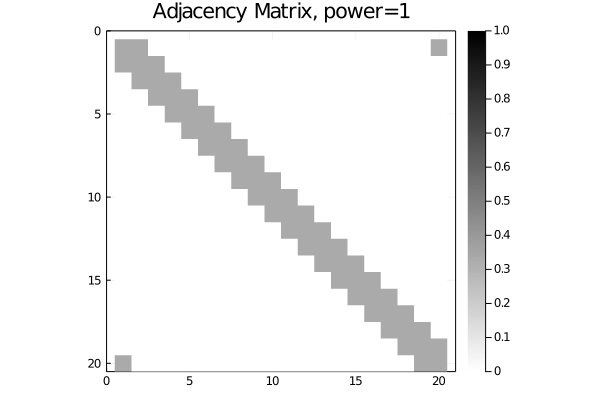

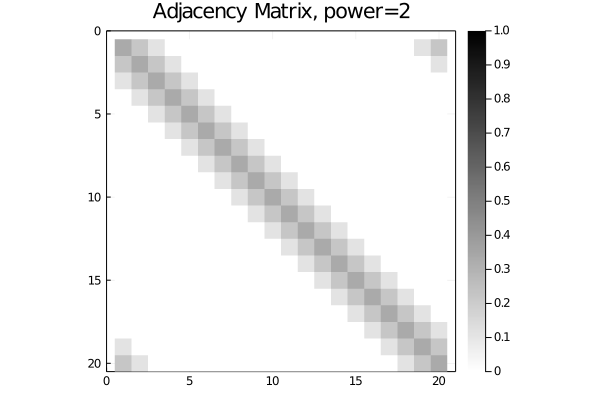

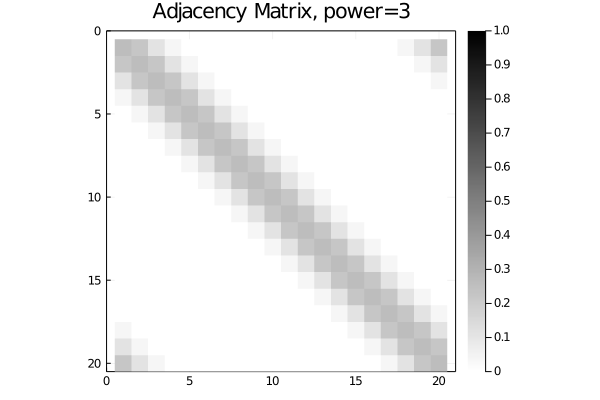

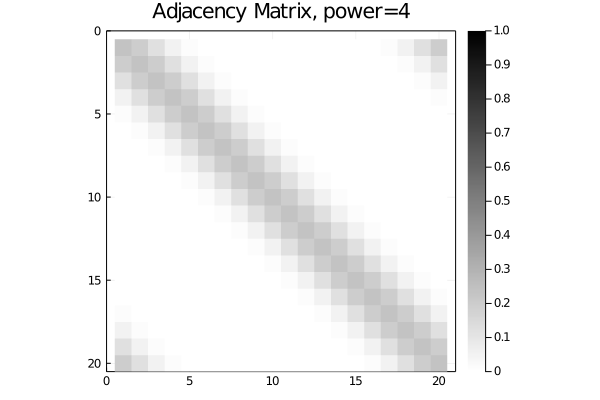

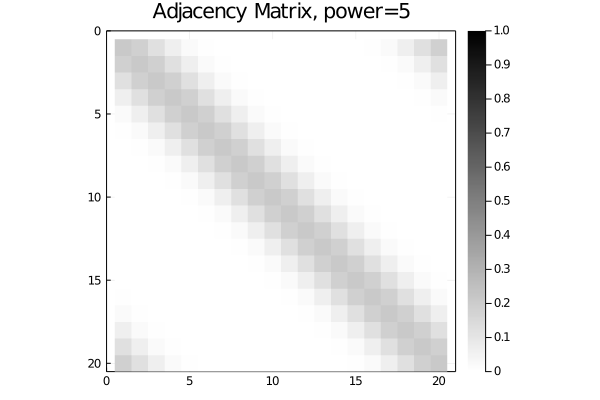

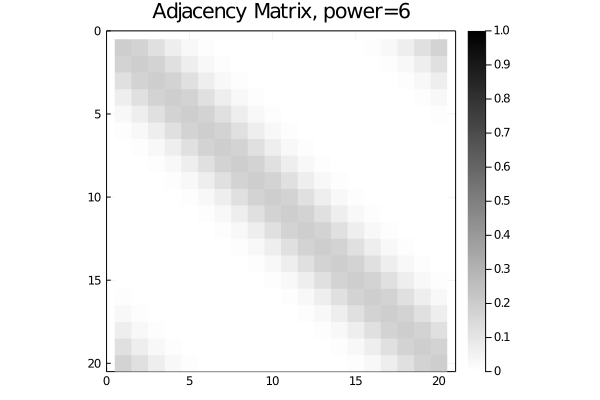

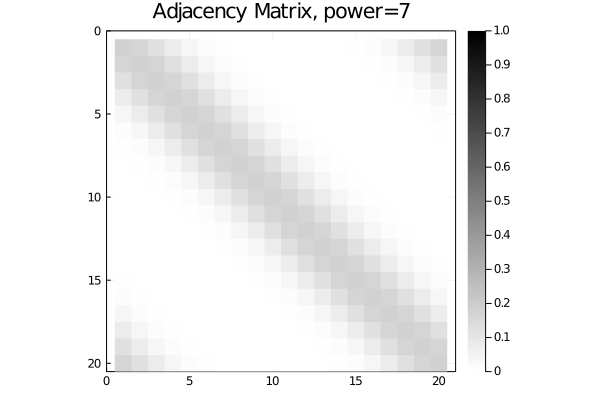

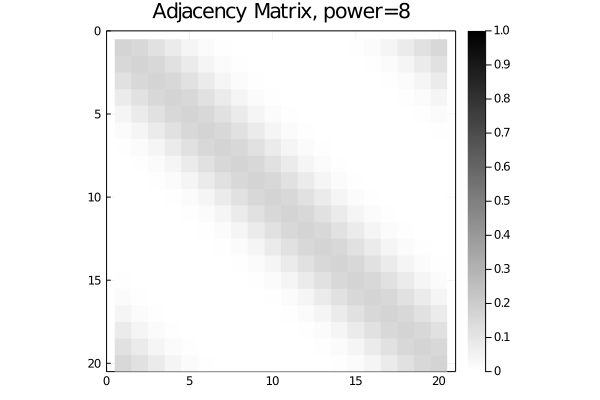

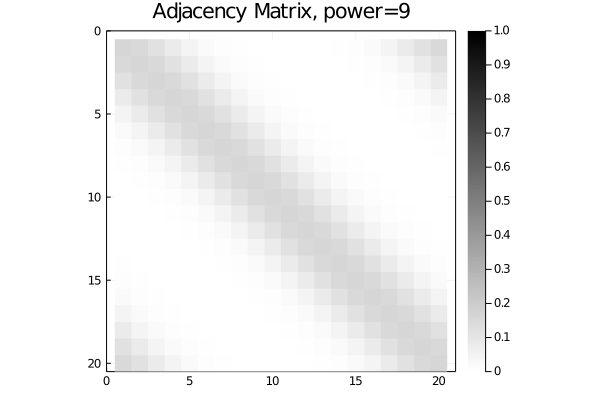

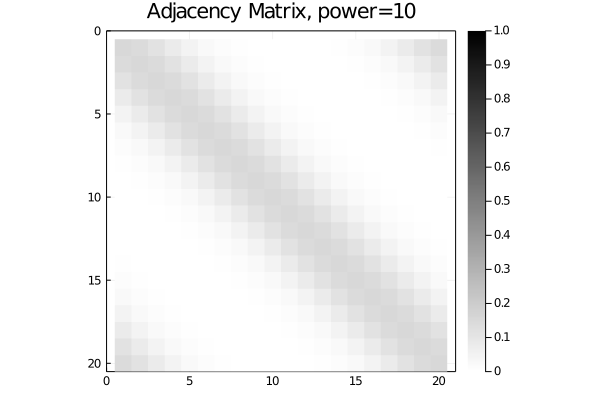

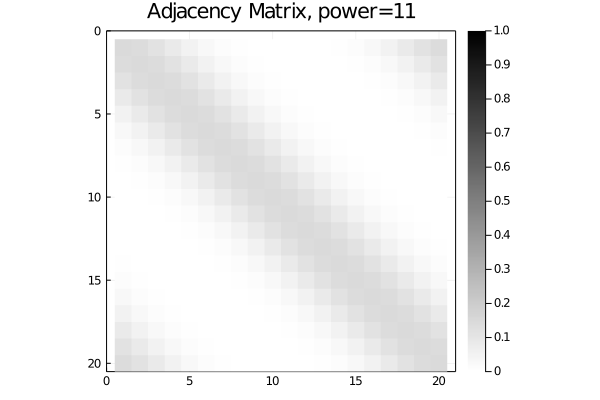

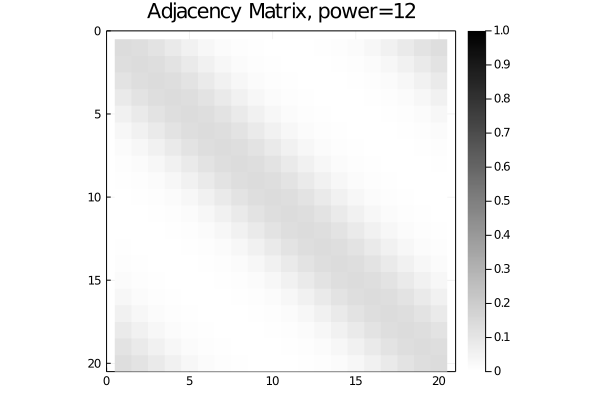

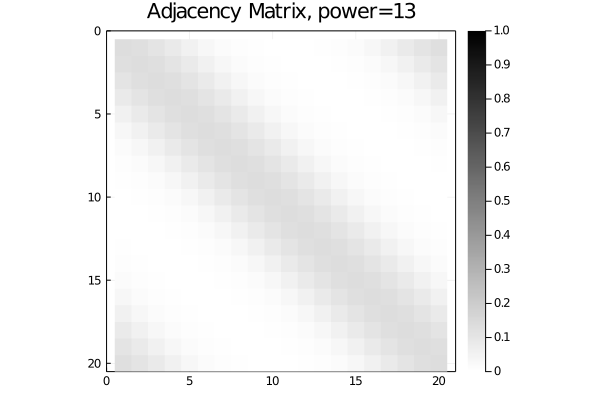

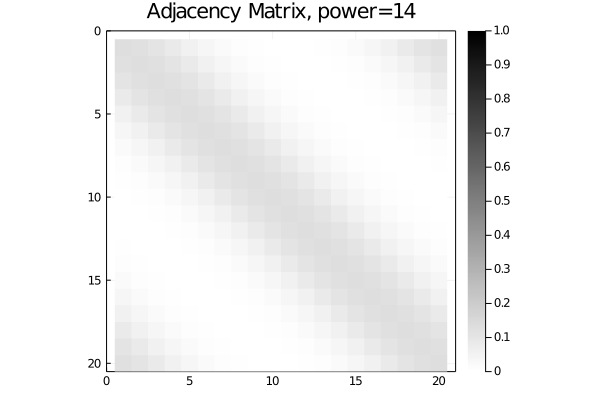

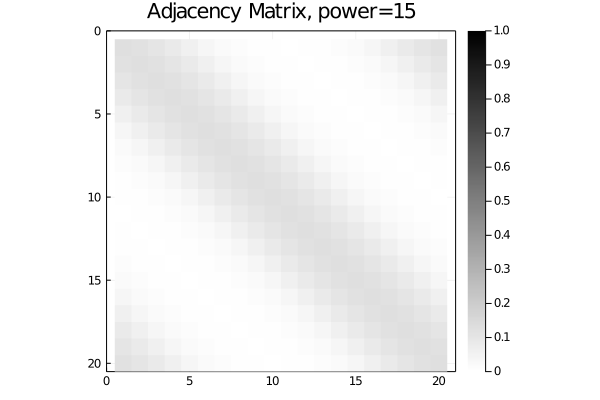

In [120]:
for i in 0:K_MAX   
    hVarX = vizMatrixThresh(Adj_Normed_Dict[i],i)
    p1=plot(hVarX,layout=1)
    display(p1)
    savefig(p1,"adjnormedmatrixPow$(i).png")    
end

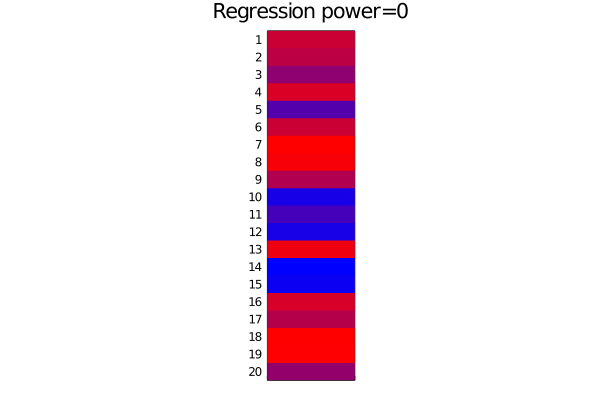

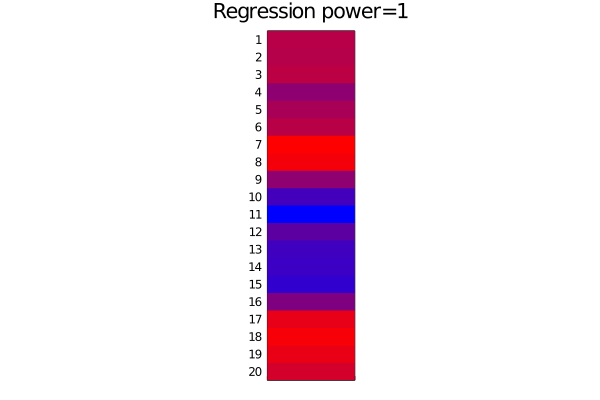

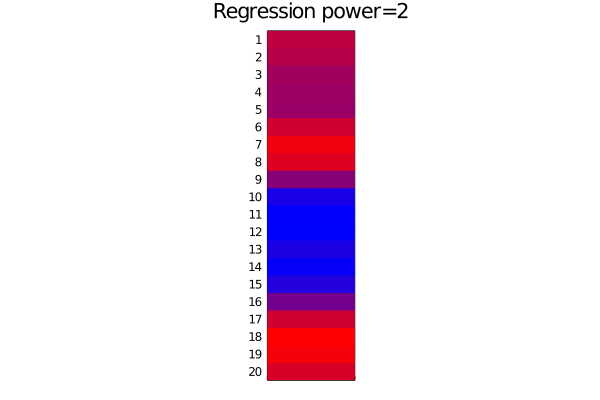

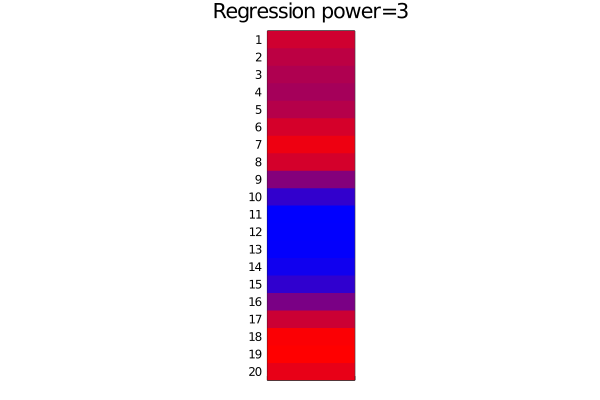

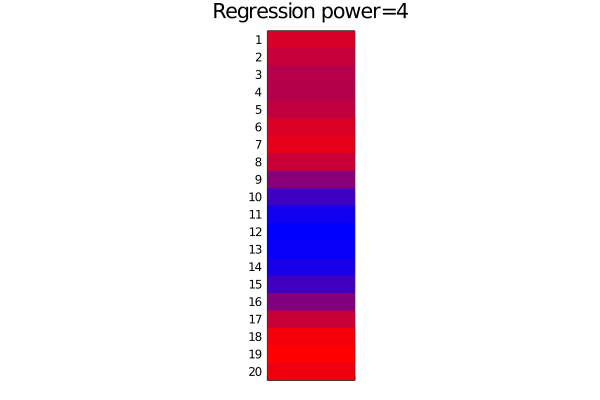

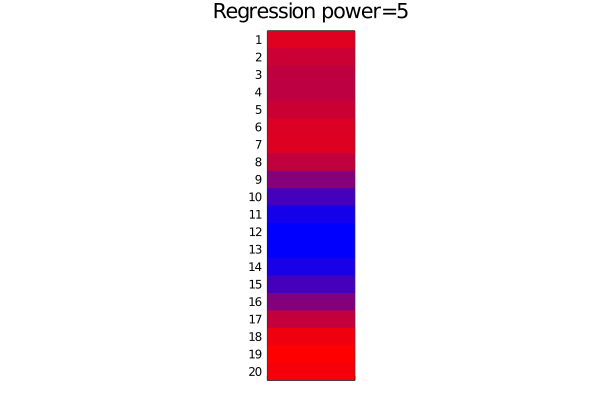

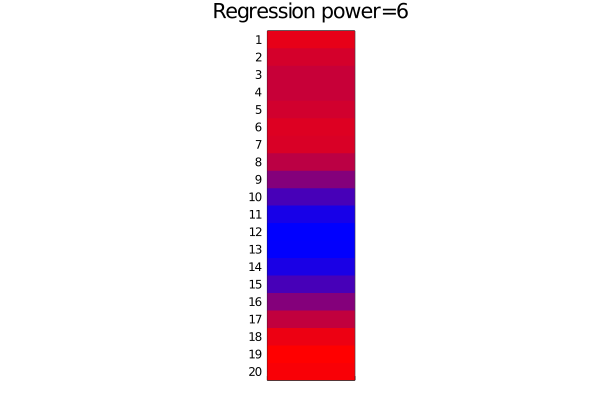

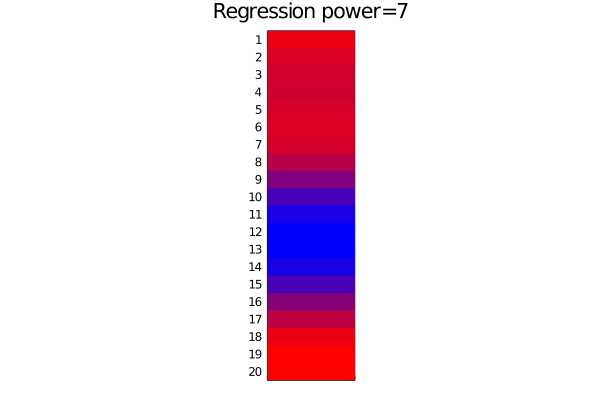

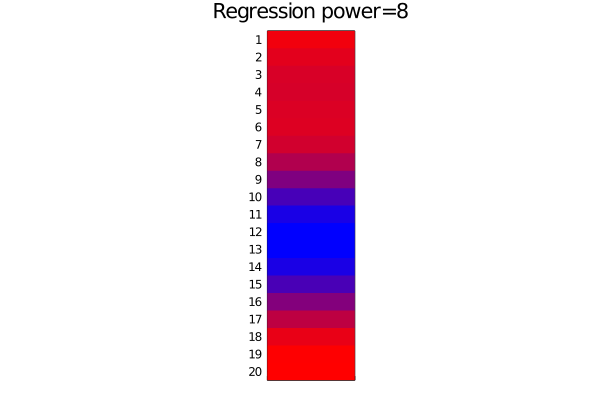

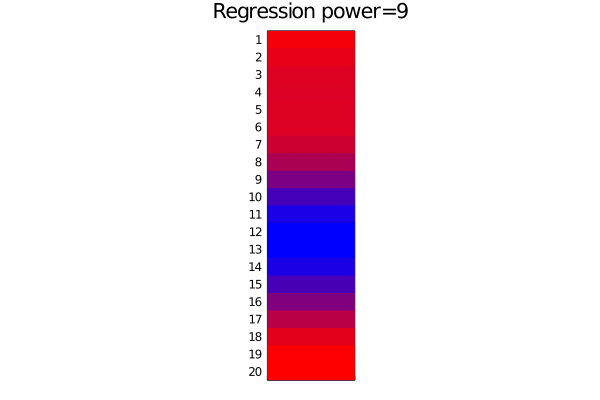

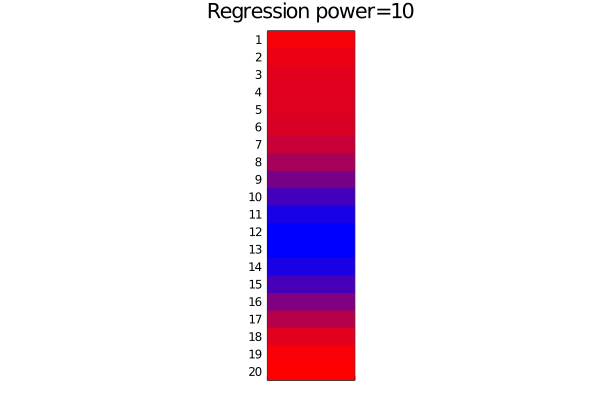

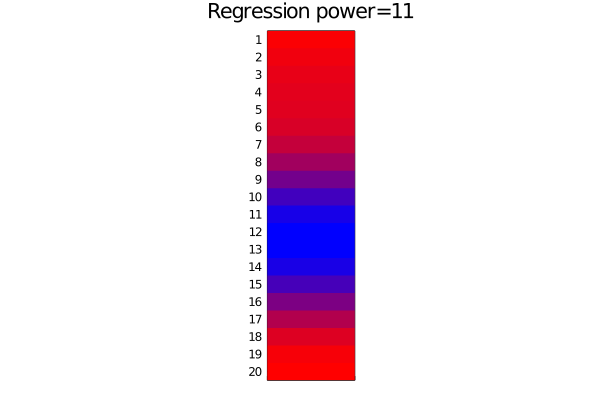

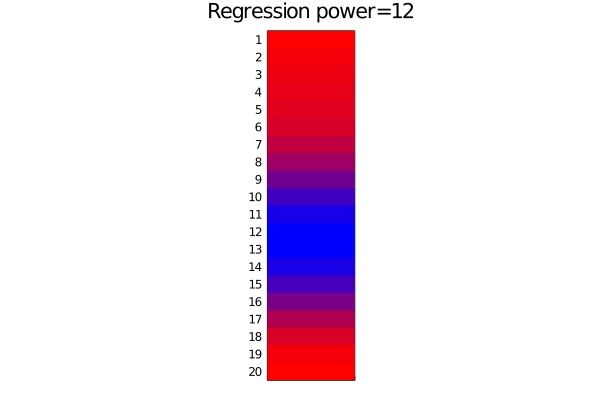

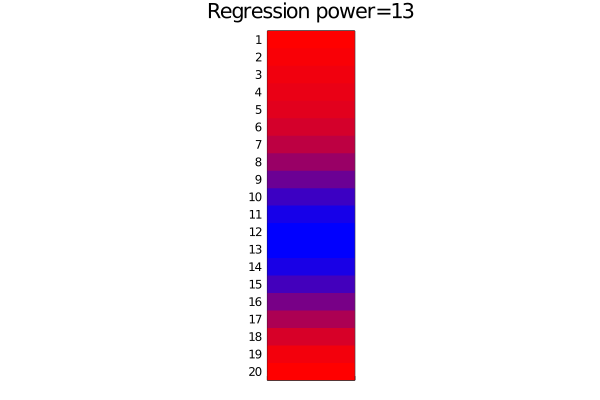

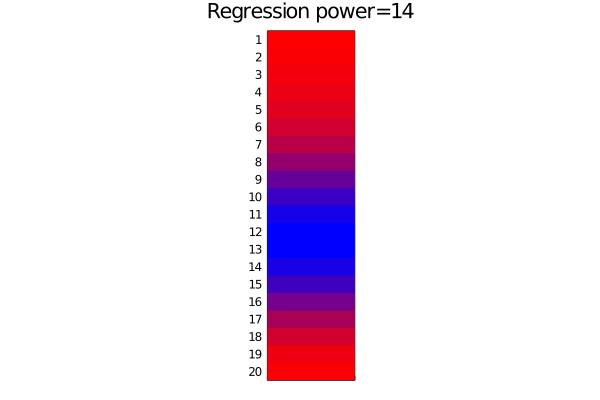

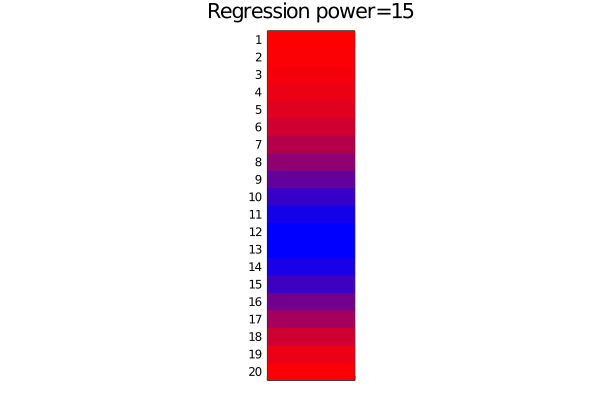

In [121]:
#network feature propagation 
feature_Regression = Dict()
for i in 0:K_MAX   
    feature_Regression[i] = Adj_Normed_Dict[i] * varX
end

for i in 0:K_MAX   
    hVarX = displayProjectedFeature(feature_Regression[i],i) 
    p3=plot(hVarX,layout=1)
    display(p3)
    savefig(p3,"Regression Pow$(i).png")    
end



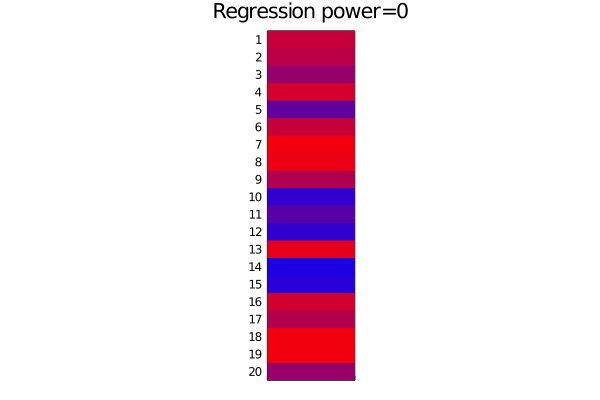

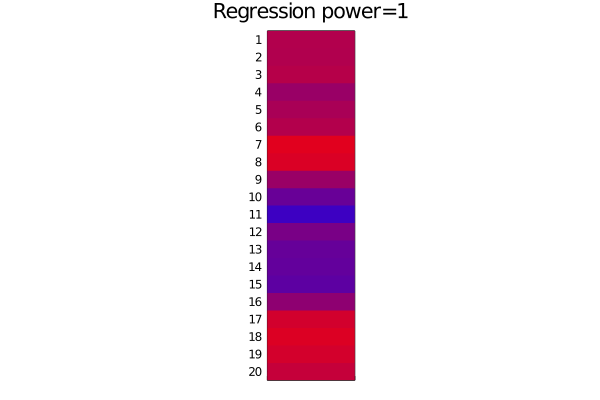

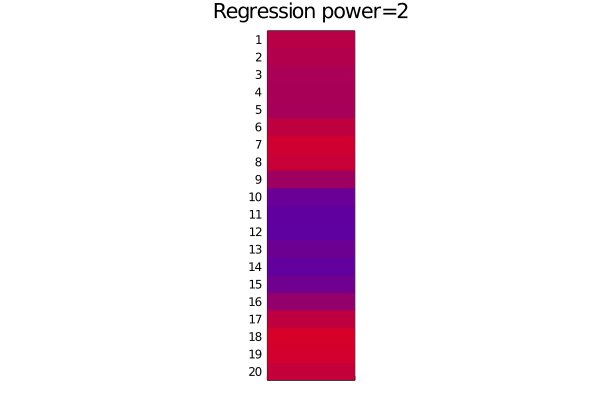

[0.5525119594203352; 0.4533378450463539; 0.1658113727245254; 0.65294635427028; -0.22784149663169684; 0.5512874268758963; 0.8952800424372702; 0.8436896039879025; 0.3825848477073497; -0.6219950580832032; -0.31884214887159734; -0.6136630704523025; 0.7868637441720245; -0.7690913570749629; -0.6879090161760286; 0.6350685163141547; 0.4046676230225472; 0.8943784562918171; 0.8877349909216301; 0.19151520926712817]
[0.39912167124460574; 0.39055372573040475; 0.42403185734705306; 0.19697207678770287; 0.3254640948381598; 0.4062419908938232; 0.7634190244336896; 0.7071848313775074; 0.20142646453734966; -0.1860841197491503; -0.518166759135701; -0.048547158383958455; -0.19863022778508033; -0.2233788763596557; -0.2739772856456123; 0.11727570772022441; 0.6447048652095063; 0.7289270234119981; 0.6578762188268584; 0.5439207198696978]


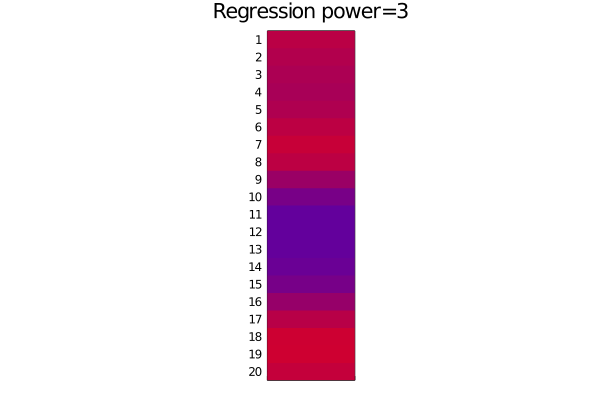

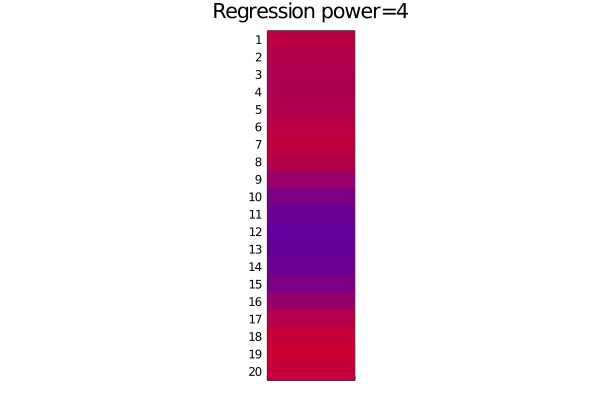

[0.44453203894823606; 0.4045690847740212; 0.3371858866217202; 0.31548934299097187; 0.309559387506562; 0.4983750367218908; 0.6256152822350067; 0.5573434401161822; 0.2408423920552356; -0.16760813811583386; -0.25093267908960326; -0.2551147151015799; -0.1568520875095648; -0.2319954632634494; -0.12669348476168116; 0.16266776242803951; 0.49696919878057627; 0.6771693691494542; 0.6435746540361849; 0.533639536647054]
[0.46091355345643714; 0.39542900344799253; 0.35241477146223776; 0.3207448723730847; 0.3744745890731416; 0.4778499021544865; 0.5604445863576933; 0.47460037146880824; 0.21019256468519465; -0.05923280838340049; -0.224551844102339; -0.22096649390024933; -0.21465408862486468; -0.17184701184489842; -0.06534039519903036; 0.17764782548231156; 0.44560211011935663; 0.6059044073220717; 0.6181278532775644; 0.540582076543825]


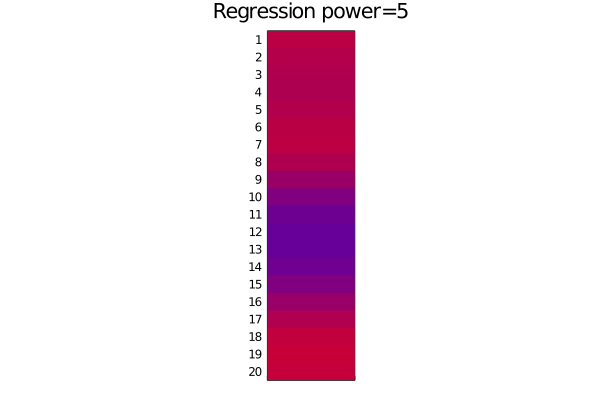

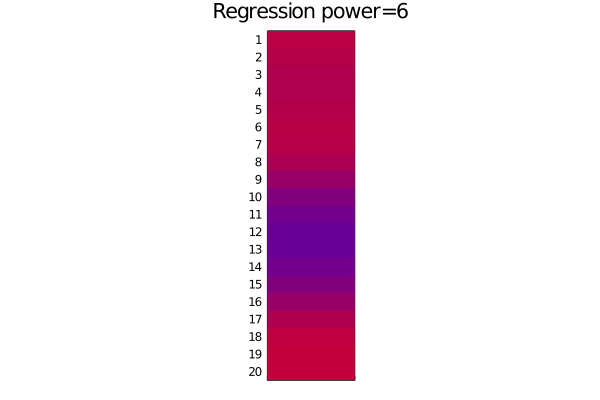

[0.4656415444827515; 0.40291910945555576; 0.35619621576110505; 0.34921141096948805; 0.39102312120023763; 0.4709230258617738; 0.5042982866603294; 0.4150791741705654; 0.20852004259020077; -0.024530695933514937; -0.16825038212866292; -0.2200574755424843; -0.2024891981233375; -0.15061383188959782; -0.019846527187205754; 0.18596984680087927; 0.4097181143079134; 0.5565447902396643; 0.5882047790478203; 0.539874494425942]
[0.4694783827880832; 0.4082522898998041; 0.36944224539538295; 0.36547691597694354; 0.40371918601049983; 0.4554148112407802; 0.4634334955642228; 0.3759658344736985; 0.19968950694241708; 0.0052463215093409635; -0.13761285120155406; -0.19693235193149491; -0.19105350185180653; -0.12431651906671368; 0.005169829241358559; 0.19194714464052895; 0.384077583782819; 0.5181558945317993; 0.5615413545711422; 0.5312402726521713]


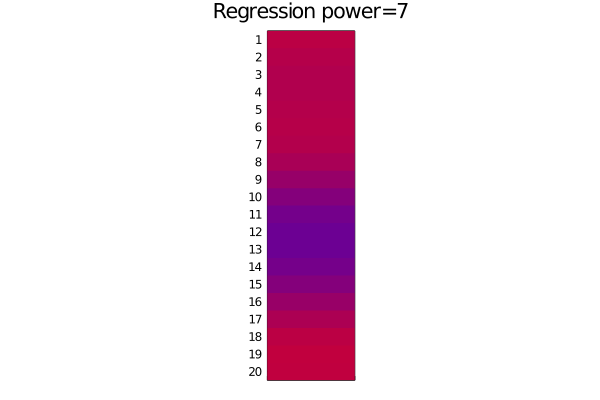

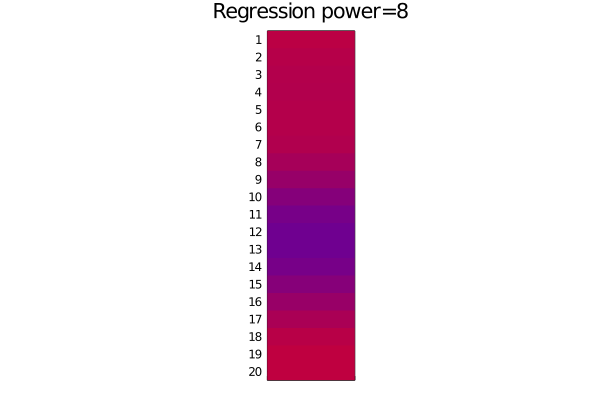

[0.4696569817800195; 0.4157243060277567; 0.38105715042404353; 0.37954611579427544; 0.40820363774274115; 0.4408558309385009; 0.4316047137595672; 0.34636294566011283; 0.19363388764181882; 0.022440992416734626; -0.10976629387456936; -0.17519956832828515; -0.1707674576166717; -0.10340006389238723; 0.024266818271724624; 0.19373151922156884; 0.36472687431838247; 0.48792494429525346; 0.5369791739183709; 0.5207533366704655]
[0.4687115414927472; 0.4221461460772733; 0.3921091907486919; 0.38960230132035334; 0.40953519482517253; 0.4268880608136031; 0.4062744967860603; 0.32386718235383294; 0.18747927523955543; 0.03543619539466136; -0.08750828992870663; -0.15191110660650872; -0.14978902994578136; -0.08330023441244475; 0.03819942453363542; 0.1942417372705586; 0.3487944459450683; 0.4632103308440023; 0.51521915162803; 0.5091298307896186]


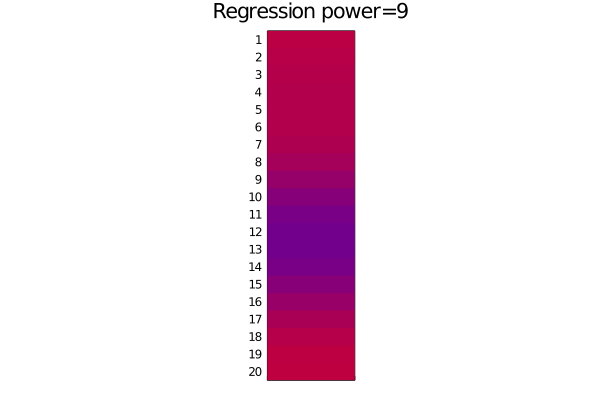

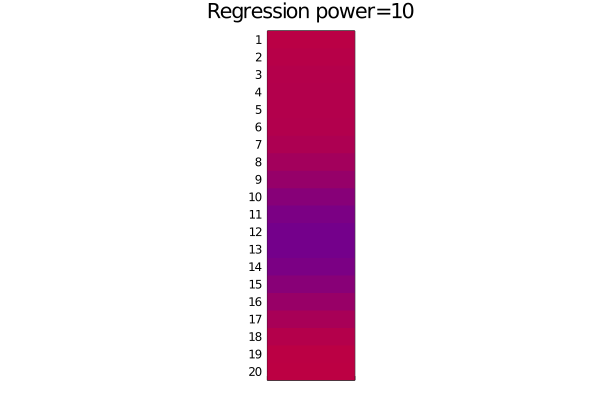

[0.4666625061198797; 0.4276556261062374; 0.4012858793821062; 0.3970822289647392; 0.40867518565304306; 0.414232584141612; 0.3856765799844988; 0.3058736514598162; 0.18226088432934995; 0.04513572690183674; -0.06799440038018469; -0.12973614216033225; -0.128333456988245; -0.06496327994153021; 0.049713642463916435; 0.19374520258308736; 0.335415504686543; 0.44240797613903343; 0.49585310442055036; 0.49768684130346535]
[0.46400165784319414; 0.43186800386940777; 0.4086745781510276; 0.40234776466662947; 0.40666333291979806; 0.40286144992638456; 0.3685942718619757; 0.2912703719245549; 0.17775675423033432; 0.05313407028366735; -0.0508649385462267; -0.10868799984292063; -0.10767762636336917; -0.04786103148861967; 0.059498521701824514; 0.192958116577849; 0.32385622780288803; 0.424558861748709; 0.47864930728768296; 0.4867341506146317]


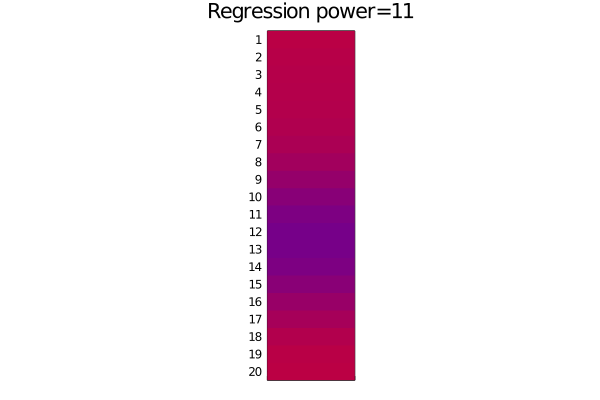

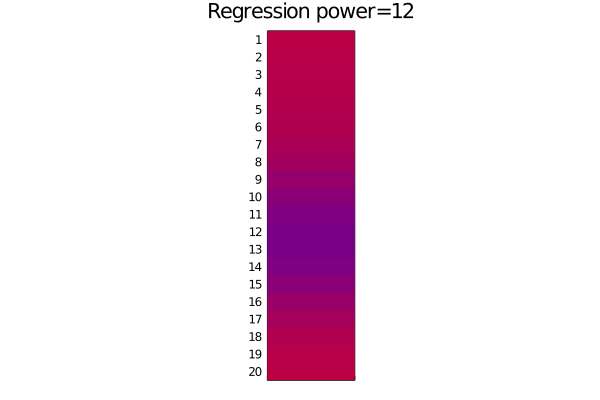

[0.4608679374424112; 0.43484807995454317; 0.41429678222902155; 0.4058952252458184; 0.4039575158376041; 0.39270635156938605; 0.3542420312376384; 0.27920713267228825; 0.1740537321461855; 0.06000862865592496; -0.035472956035160055; -0.08907685491750553; -0.08807555256496984; -0.0320133787167214; 0.06819853559701801; 0.1921042886941872; 0.3137910687098154; 0.4090214656130933; 0.4633141065503413; 0.476461705248503]
[0.4573925742151524; 0.4366709332086587; 0.41834669580979444; 0.40804984110414805; 0.40085303088426955; 0.3836352995482095; 0.3420518384931043; 0.2691676320187041; 0.17108983115813298; 0.06619646825565012; -0.02151372743224684; -0.0708751211725451; -0.06972192873306554; -0.01729679856155772; 0.07609648185816129; 0.19136463100034012; 0.30497227433903196; 0.3953755469577499; 0.44959909247064583; 0.4668812497470851]


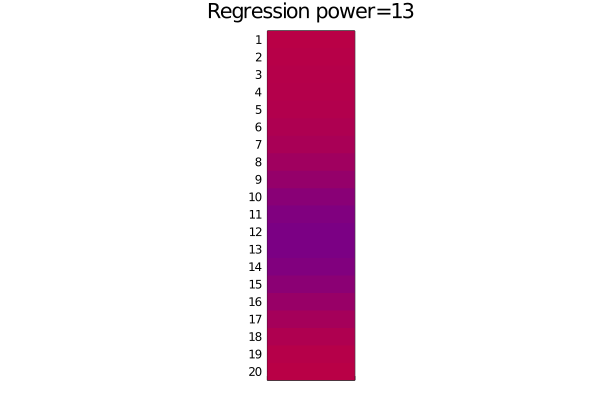

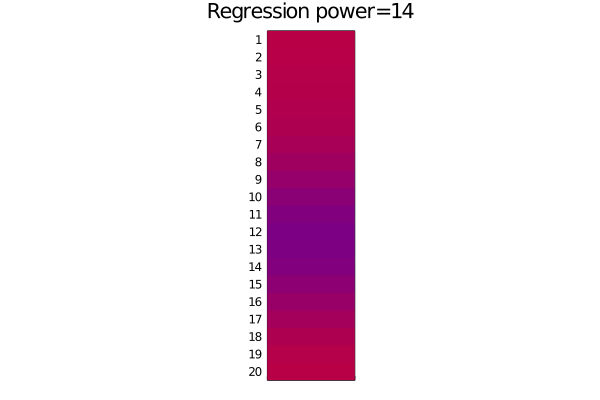

[0.4536482523902987; 0.4374700677445351; 0.421022490040867; 0.4090831892660706; 0.39751272384554237; 0.37551338964186115; 0.3316182566866727; 0.2607697672233138; 0.1688179771441624; 0.07192419066051207; -0.00873079344971394; -0.05403692577928586; -0.05263128282238945; -0.00364074847882076; 0.08338810476564787; 0.19081112906584444; 0.2972374840990407; 0.3833156379224759; 0.437285296391827; 0.4579576388109612]
[0.44969198631526497; 0.43738027005856694; 0.4225252490171576; 0.40920613438416; 0.39403643425115803; 0.3682147900580254; 0.3226338045172825; 0.25373533368471624; 0.16717064500932943; 0.07733712478498686; 0.003052157143837445; -0.03846633401712973; -0.036769652360165384; 0.009038691154812525; 0.09018616178422387; 0.19047890597684433; 0.2904547503624536; 0.37261280613778114; 0.42618619104175465; 0.44963039586436226]


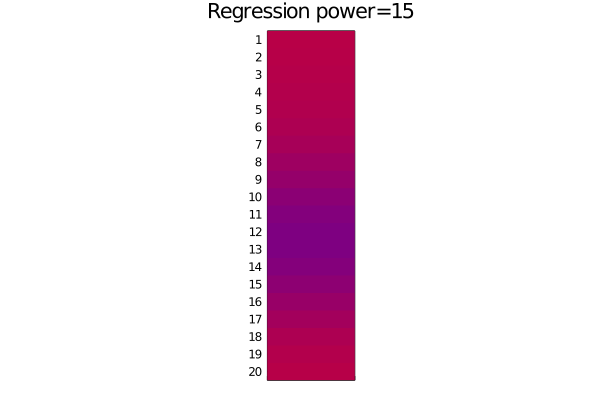

[0.4455675507460647; 0.43653250179699654; 0.4230372178199615; 0.40858927255082517; 0.3904857862311144; 0.3616283429421553; 0.314861309420008; 0.24784659440377604; 0.1660810344930108; 0.08251997564605124; 0.013974315970564852; -0.024061276411152535; -0.022065765074160873; 0.02081840019295704; 0.09656791963862696; 0.1903732727078406; 0.2845154874923597; 0.36308458251399645; 0.4161431310146327; 0.44183619107379396]
[0.44131208120561843; 0.43504575678767426; 0.42271966405592776; 0.4073707588673004; 0.3869011339080316; 0.35565847953109264; 0.3081120822553131; 0.2429296461055983; 0.16548253484761266; 0.08752510870320897; 0.02414433840182113; -0.010717575171582866; -0.008436213764118752; 0.03177351825247435; 0.1025865308464749; 0.19048555994627578; 0.2793244475713989; 0.3545810670069963; 0.40702130153414107; 0.4345156242781638]


In [122]:
#network feature propagation 
feature_Regression = Dict()
for i in 0:K_MAX   
    feature_Regression[i] = Adj_Normed_Dict[i] * varX
end

for i in 0:K_MAX   
    hVarX = displayProjectedFeatureThres(feature_Regression[i],i) 
    p3=plot(hVarX,layout=1)
    display(p3)
    savefig(p3,"Regression PowThres$(i).png")  
    println(feature_Regression[i])
end


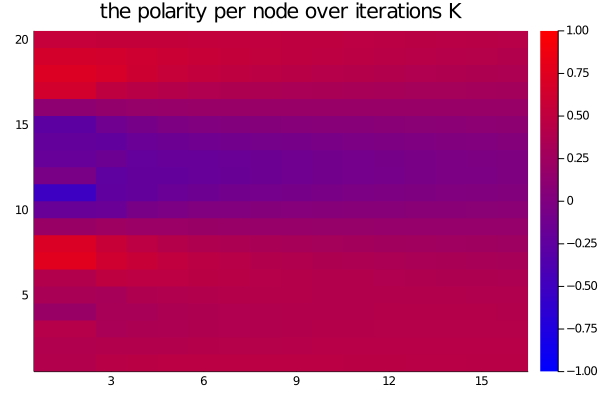

In [123]:
classVec = feature_Regression[1]

for i in 1:K_MAX   
    classVec = hcat(classVec,feature_Regression[i])
end
h1 = heatmap(classVec,fill=cgrad([:blue,:red]),clims=(-1,1))
title!("the polarity per node over iterations K")
display(h1)
savefig(h1,"heatmapProgression.png") 

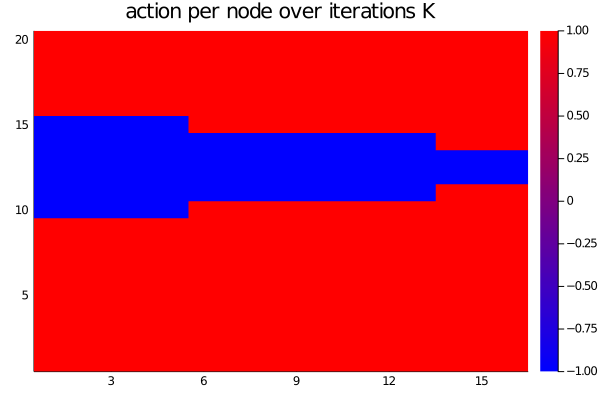

In [129]:
classVecSIGN = sign.(classVec)
h1 = heatmap(classVecSIGN,fill=cgrad([:blue,:red]),clims=(-1,1))
title!("action per node over iterations K")
display(h1)
savefig(h1,"heatmapProgressionSIGN.png") 

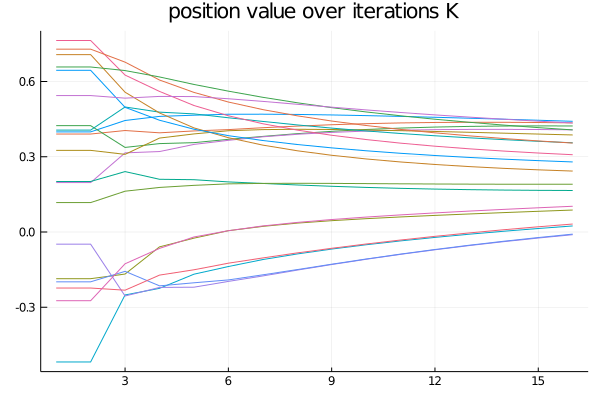

In [130]:
#now plot the lines for each node
p1 = plot(classVec',leg=false)
title!("position value over iterations K")
display(p1)
savefig(p1,"classProgressions.png") 

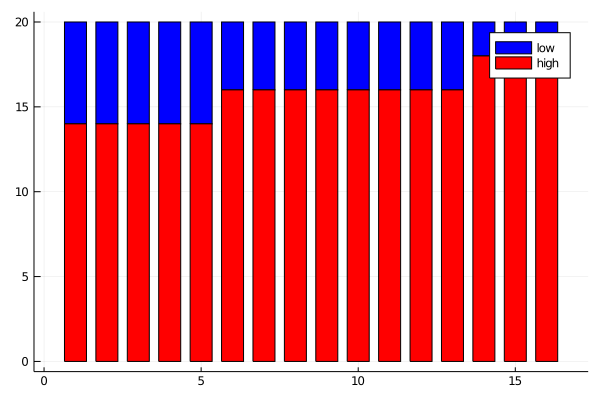

[6, 6, 6, 6, 6, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2]
[14, 14, 14, 14, 14, 16, 16, 16, 16, 16, 16, 16, 16, 18, 18, 18]


In [161]:
lowTotals = [length(findall(classVec[:,i] .<= 0)) for i in 1:size(classVec)[2]]
highTotals = [length(findall(classVec[:,i] .> 0)) for i in 1:size(classVec)[2]]
println(lowTotals)
println(highTotals)
#now show the distribution between polar sides as total sum above or below
g1 = groupedbar(hcat(lowTotals,highTotals),label=["low" "high"],c=[:blue :red],
        bar_position = :stack, bar_width=0.7)
display(g1)
savefig(g1,"groupProgressions.png") 

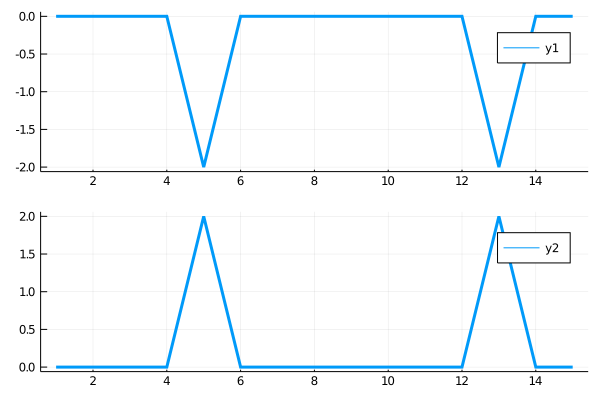

In [164]:

lowTotalsDiff = diff(lowTotals)
highTotalsDiff = diff(highTotals)
p1 = plot([lowTotalsDiff highTotalsDiff], layout=(2,1),linewidth=3)
display(p1)
savefig(p1,"diffsProgressions.png") 

In [125]:
#returns array with class probabilities
function softmax(a)
    c = maximum(a)
    exp.(a) / sum(exp.(a)) #or via exp.(a .- c) / sum(exp.(a .- c))
end
#logistic function
function logisticFN(x)
    return 1/(1 + exp(-x))
end


logisticFN (generic function with 1 method)

In [127]:
#now draw the change points 

In [128]:
##methodology